In [114]:
import pandas as pd
import json 
import pickle
from os import listdir
import numpy as np

#ml methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MiniBatchKMeans
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics.pairwise as smp
from sklearn.decomposition import PCA

#importing plotting methods
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
%matplotlib inline
plt.rcParams['savefig.dpi'] = 144

In [2]:
ice_saga_dir = 'Raw_Data/all_sagas_text/jsons/all'

In [3]:
ice_saga_list = listdir(ice_saga_dir)
#ice_saga_list

In [4]:
with open(ice_saga_dir + '/' + ice_saga_list[0], 'rb') as picklefile:
    saga_json = pickle.load(picklefile)
saga_json.keys()

dict_keys(['title', 'title_i', 'language', 'translation', 'text_e', 'text_i', 'punctuation', 'webpage'])

In [5]:
skald = []
for saga in ice_saga_list:
    with open(ice_saga_dir + '/' + saga, 'rb') as picklefile:
        saga_json = pickle.load(picklefile)
    skald.append([saga_json['title'], 'unknown',saga_json['text_i']])

In [6]:
len(skald)

42

In [7]:
len(ice_saga_list)

42

In [8]:
heim_dir = 'Raw_Data/gut_heim/jsons'

In [9]:
heim_saga_list = listdir(heim_dir)
heim_saga_list

['.DS_Store',
 'h-grafel.pkl',
 'hakon-g.pkl',
 'halfd-sv.pkl',
 'har-har.pkl',
 'har-sig.pkl',
 'herdibr.pkl',
 'ingi-k.pkl',
 'm-blind.pkl',
 'm-erl.pkl',
 'mag-berf.pkl',
 'magnus-g.pkl',
 'msonsaga.pkl',
 'okyrra.pkl',
 'ol-helg.pkl',
 'ol-tr.pkl',
 'prolog.pkl',
 'yngl-sag.pkl']

In [10]:
#del heim_saga_list[0]
#heim_saga_list

['h-grafel.pkl',
 'hakon-g.pkl',
 'halfd-sv.pkl',
 'har-har.pkl',
 'har-sig.pkl',
 'herdibr.pkl',
 'ingi-k.pkl',
 'm-blind.pkl',
 'm-erl.pkl',
 'mag-berf.pkl',
 'magnus-g.pkl',
 'msonsaga.pkl',
 'okyrra.pkl',
 'ol-helg.pkl',
 'ol-tr.pkl',
 'prolog.pkl',
 'yngl-sag.pkl']

In [11]:
with open(heim_dir + '/' + heim_saga_list[0], 'rb') as picklefile:
    saga_json = pickle.load(picklefile)
saga_json.keys()

dict_keys(['title', 'title_i', 'language', 'translation', 'text_e', 'text_i', 'punctuation', 'webpage'])

In [12]:
for saga in heim_saga_list:
    with open(heim_dir + '/' + saga, 'rb') as picklefile:
        saga_json = pickle.load(picklefile)
    skald.append([saga_json['title'], 'snorri',saga_json['text_i']])

In [13]:
len(skald)

59

In [14]:
df_skald = pd.DataFrame(skald)

In [15]:
df_skald.columns = ['Title', 'Author', 'Text']
df_skald.head()

,Title,Author,Text
0,Bárðar saga snæfellsáss,unknown,[Dumbur hefir konungur heitið Hann réð fyrir h...
1,Bjarnar saga hítdælakappa,unknown,[Nú skal segja nokkuð af þeim íslensku mönnum ...
2,Droplaugarsona saga,unknown,[Ketill hét maður er kallaður var þrymur Hann ...
3,Egil's Saga\n,unknown,[Úlfur hét maður sonur Bjálfa og Hallberu dótt...
4,Finnboga saga ramma,unknown,[Ásbjörn hét maður Hann var kallaður dettiás H...


Clustering of All Text

In [16]:
type(df_skald.iloc[0,2])

list

In [17]:
def stringer(x):
    ' '.join(x)
    x = str(x)
    return x

In [18]:
df_skald['Text'] = df_skald['Text'].map(lambda x: stringer(x))
df_skald.head()

,Title,Author,Text
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...


In [19]:
type(df_skald.iloc[0,2])

str

In [20]:
tfidf = TfidfVectorizer()

In [21]:
tfidf_vecs = tfidf.fit_transform(df_skald['Text'])
pd.DataFrame(tfidf_vecs.todense(), 
             columns=tfidf.get_feature_names()
            ).head()

,10,100,1000,1001,1006,1007,1008,1009,101,1010,...,þýtr,þýð,þýða,þýðast,þýðeskur,þýðist,þýðr,þýðrar,þýðum,þýður
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002086,0.0,0.000000,0.0,0.0,0.0,0.002086,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.001019,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [22]:
tfidf_vecs_t = tfidf.fit_transform(df_skald['Text']).transpose()

In [23]:
tfidf_vecs_t.shape

(47503, 59)

In [24]:
nmf = NMF(n_components=59)
nmf_vecs = nmf.fit_transform(tfidf_vecs_t)

In [25]:
nmf_vecs.shape

(47503, 59)

In [26]:
kmeans = KMeans(n_clusters=3)
authors = kmeans.fit_predict(nmf_vecs.transpose())

In [27]:
kmeans.inertia_

5367.8215641956076

In [28]:
authors.shape

(59,)

In [29]:
print(authors)

[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [30]:
df_skald['Skald'] = authors

In [31]:
df_skald.head()

,Title,Author,Text,Skald
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...,0
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...,0
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...,0


In [32]:
whos = df_skald.groupby(['Skald']).count().reset_index()
whos.head(10)

,Skald,Title,Author,Text
0,0,57,57,57
1,1,1,1,1
2,2,1,1,1


In [33]:
df_skald[df_skald['Author'] == 'snorri']

,Title,Author,Text,Skald
42,Haralds saga gráfeldar,snorri,"['1 Upphaf Eiríkssona', 'Eiríkssynir tóku þá k...",0
43,Hákonar saga Aðalsteinsfóstra,snorri,"['1 Hákon til konungs tekinn', 'Hákon Aðalstei...",0
44,Hálfdanar saga svarta,snorri,"['1 kafli', 'Hálfdan var þá veturgamall er fað...",0
45,Haraldar saga hárfagra,snorri,['1 Hér hefur upp sögu Haralds konungs hárfagr...,0
46,Haralds saga Sigurðarsonar,snorri,"['1 Upphaf Haralds konungs harðráða', 'Haraldu...",0
47,Hákonar saga herðibreiðs,snorri,"['1 Upphaf Hákonar herðibreiðs', 'Hákon sonur ...",0
48,Saga Inga konungs og bræðra hans,snorri,"['1 Upphaf Inga konungs', 'Ingiríður drottning...",0
49,Magnúss saga blinda og Haralds gilla,snorri,"['1 Upphaf Magnúss blinda', 'Magnús sonur Sigu...",0
50,Magnúss saga Erlingssonar,snorri,"['1 Upphaf Magnúss konungs Erlingssonar', 'Síð...",0
51,Magnúss saga berfætts,snorri,"['1 Upphaf Magnúss konungs berfætts', 'Magnús ...",0


In [34]:
snorr = df_skald['Skald'] != 0

In [35]:
df_skald[snorr]

,Title,Author,Text,Skald
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2


In [193]:
inertia_score = []
for n in range(1,20):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit_predict(nmf_vecs.transpose())
    inertia_score.append([n, kmeans.inertia_])

In [194]:
df_kscores = pd.DataFrame(inertia_score)
df_kscores.head()

,0,1
0,1,143571.904913
1,2,15658.202577
2,3,4497.491782
3,4,2542.490324
4,5,1738.572367


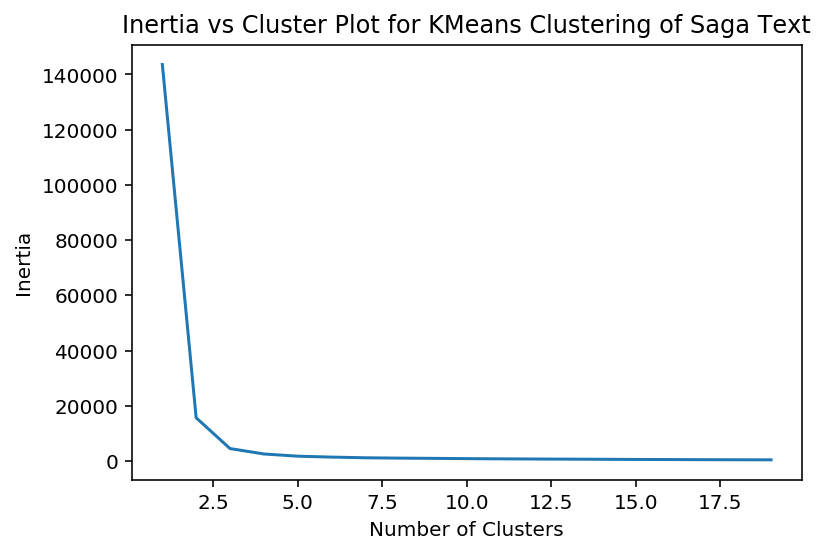

In [195]:
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Cluster Plot for KMeans Clustering of Saga Text')
plt.plot(df_kscores.iloc[:,0], df_kscores.iloc[:,1])
plt.savefig('kmi.jpg')

Language Identification

In [154]:
with open(ice_saga_dir + '/' + ice_saga_list[3], 'rb') as picklefile:
    saga_json = pickle.load(picklefile)
saga_json.keys()

dict_keys(['title', 'title_i', 'language', 'translation', 'text_e', 'text_i', 'punctuation', 'webpage'])

In [155]:
saga_json['translation']

"1893 translation into English by W. C. Green from the original Icelandic 'Egils saga Skallagrímssonar'."

In [157]:
len(saga_json['text_i'])

2086

In [189]:
test_str = saga_json['text_i'][0].replace(' ', '')
test_str

'ÚlfurhétmaðursonurBjálfaogHallberudótturÚlfshinsóargaHúnvarsystirHallbjarnarhálftröllsíHrafnistuföðurKetilshængsÚlfurvarmaðursvomikillogsterkuraðeigivoruhansjafningjarenerhannvaráungaaldriláhannívíkinguogherjaðiMeðhonumvarífélagsskapsámaðurerkallaðurvarBerðlu-KárigöfugurmaðuroghinnmestiafreksmaðuraðafliogáræðihannvarberserkurÞeirÚlfuráttueinnsjóðbáðirogvarmeðþeimhinkærstavinátta'

In [207]:
saxon = []
count = 0
while count < len(saga_json['text_i']):
    
    s = 0
    letters = []
    text = saga_json['text_i'][count].replace(' ', '')
    while s < len(text):
        s_char = text[s]
        letters.append(s_char)
        s += 1
    letters = ' '.join(letters)    
    saxon.append(['I', letters])
    count += 1

In [209]:
latin = []
count = 0
while count < len(saga_json['text_e']):
    
    s = 0
    letters = []
    text = saga_json['text_e'][count].replace(' ', '')
    while s < len(text):
        s_char = text[s]
        letters.append(s_char)
        s += 1
    letters = ' '.join(letters)    
    latin.append(['E', letters])
    count += 1

In [210]:
latin

[['E',
  'T h e r e w a s a m a n n a m e d U l f s o n o f B j a l f a n d H a l l b e r a d a u g h t e r o f U l f t h e f e a r l e s s s h e w a s s i s t e r o f H a l l b j o r n H a l f - g i a n t i n H r a f n i s t a a n d h e t h e f a t h e r o f K e t t l e H æ i n g U l f w a s a m a n s o t a l l a n d s t r o n g t h a t n o n e c o u l d m a t c h h i m a n d i n h i s y o u t h h e r o v e d t h e s e a s a s a f r e e b o o t e r I n f e l l o w s h i p w i t h h i m w a s o n e K a r i o f B e r d l a a m a n o f r e n o w n f o r s t r e n g t h a n d d a r i n g h e w a s a B e r s e r k U l f a n d h e h a d o n e c o m m o n p u r s e a n d w e r e t h e d e a r e s t f r i e n d s'],
 ['E',
  'B u t w h e n t h e y g a v e u p f r e e b o o t i n g K a r i w e n t t o h i s e s t a t e a t B e r d l a b e i n g a m a n o f g r e a t w e a l t h T h r e e c h i l d r e n h a d K a r i o n e s o n n a m e d E y v i n d L a m b i a n o t h e r A u l v i r H n u f

In [211]:
alphabets = latin + saxon
alphabets = pd.DataFrame(alphabets)
alphabets.head()

,0,1
0,E,T h e r e w a s a m a n n a m e d U l f s o n ...
1,E,B u t w h e n t h e y g a v e u p f r e e b o ...
2,E,K v e l d u l f a n d h i s w i f e h a d t w ...
3,E,B u t w h e n T h o r o l f w a s t w e n t y ...
4,E,A u d b j o r n w a s t h e n k i n g o v e r ...


In [213]:
alphabets.tail()

,0,1
3976,I,G r í m u r a ð M o s f e l l i v a r s k í r ...
3977,I,Þ a r v a r þ á S k a f t i p r e s t u r Þ ó ...
3978,I,Þ o r s t e i n n E g i l s s o n t ó k s k í ...
3979,I,F r á Þ o r s t e i n i e r m i k i l æ t t k ...
3980,I,Þ o r g e i r s o n u r Þ o r s t e i n s v a ...


In [214]:
alphabets.columns = ['language', 'characters']

In [215]:
alphabets.head()

,language,characters
0,E,T h e r e w a s a m a n n a m e d U l f s o n ...
1,E,B u t w h e n t h e y g a v e u p f r e e b o ...
2,E,K v e l d u l f a n d h i s w i f e h a d t w ...
3,E,B u t w h e n T h o r o l f w a s t w e n t y ...
4,E,A u d b j o r n w a s t h e n k i n g o v e r ...


In [243]:
tfidf = TfidfVectorizer(analyzer='char')

In [272]:
tfidf_vec_b = tfidf.fit(alphabets['characters'])

In [244]:
tfidf_vecs_a = tfidf.fit_transform(alphabets['characters'])

In [276]:
tfidf_vec_bt = tfidf_vec_b.transform(alphabets['characters'])

In [278]:
X_model, X_hold, y_model, y_hold = train_test_split(tfidf_vec_bt, alphabets['language'], test_size = 0.3)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size = 0.3)

In [280]:
log_r = LogisticRegression()

In [281]:
log_r.fit(X_train, y_train)
log_r.score(X_test, y_test)

0.97846889952153115

In [250]:
yL_pred = log_r.predict(X_test)
metrics.accuracy_score(yL_pred, y_test)

0.96650717703349287

In [251]:
print(metrics.confusion_matrix(y_test, yL_pred))

[[397  13]
 [ 15 411]]


In [254]:
precision_recall_fscore_support(y_test, yL_pred, average='macro')

(0.96646592782560914, 0.96654070766059774, 0.96649778159438959, None)

In [282]:
with open('text_id_model', 'wb') as picklefile:
    pickle.dump(log_r, picklefile)

In [257]:
with open('skald_id_model_vecs', 'wb') as picklefile:
    pickle.dump(nmf_vecs, picklefile)

In [268]:
with open('text_id_vec', 'wb') as picklefile:
    pickle.dump(tfidf_vecs_a, picklefile)

In [274]:
with open('text_id_vec_b', 'wb') as picklefile:
    pickle.dump(tfidf_vec_b, picklefile)

In [259]:
yLh_pred = log_r.predict(X_hold)

In [260]:
metrics.accuracy_score(yLh_pred, y_hold)

0.97907949790794979

In [261]:
print(metrics.confusion_matrix(y_hold, yLh_pred))

[[568   8]
 [ 17 602]]


In [262]:
precision_recall_fscore_support(y_hold, yLh_pred, average='macro')

(0.97891270842090516, 0.9793237300305152, 0.97906254883945198, None)

In [263]:
yLh_pred

array(['I', 'I', 'E', ..., 'E', 'E', 'E'], dtype=object)

In [264]:
len(yLh_pred)

1195

In [267]:
type(X_hold)

scipy.sparse.csr.csr_matrix

Saga Text

In [39]:
df_skald

,Title,Author,Text,Skald
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...,0
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...,0
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...,0
5,Fljótsdæla saga,unknown,['Þorgerður hét kona Hún bjó í Fljótsdal austu...,0
6,Flóamanna saga,unknown,['Haraldur konungur gullskeggur réð fyrir Sogn...,0
7,Fóstbræðra saga,unknown,['Á dögum hins helga Ólafs konungs voru margir...,0
8,Grettir's Saga\n,unknown,['Önundur hét maður Hann var Ófeigsson burlufó...,0
9,Grænlendinga saga,unknown,['Þorvaldur hét maður sonur Ásvalds Úlfssonar ...,0


In [40]:
type(df_skald.iloc[0,2])

str

Create a Cluster Classifier

In [303]:
tfidf_vecs = tfidf.fit_transform(df_skald['Text'])

In [314]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vecs.todense(), df_skald['Skald'], test_size = 0.3)

In [410]:
knn = KNeighborsClassifier(n_neighbors=3, metric=smp.cosine_distances)
knn.fit(X_train, y_train)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) i

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function cosine_distances at 0x114d58d08>,
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [411]:
knn.score(X_test, y_test)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) i

1.0

PCA of Saga Text

In [41]:
# Create the PCA-generator so it will retain 2 principal components
pca = PCA(n_components=2)

In [42]:
# Transform the data into our 2-D PCA space
norm_dist_pca = pca.fit_transform(tfidf_vecs.todense())
# Retrieve and print the eigenvectors
eigvecs = pca.components_
print(eigvecs)

[[  3.85032522e-03   1.78156965e-04  -2.18995616e-04 ...,  -1.41174101e-04
   -3.81621819e-05   3.69559753e-04]
 [ -6.23121968e-03  -4.54085310e-04   1.60558988e-04 ...,   6.72707764e-05
    2.87848707e-05  -7.73150680e-04]]


In [43]:
eigvecs.shape

(2, 47503)

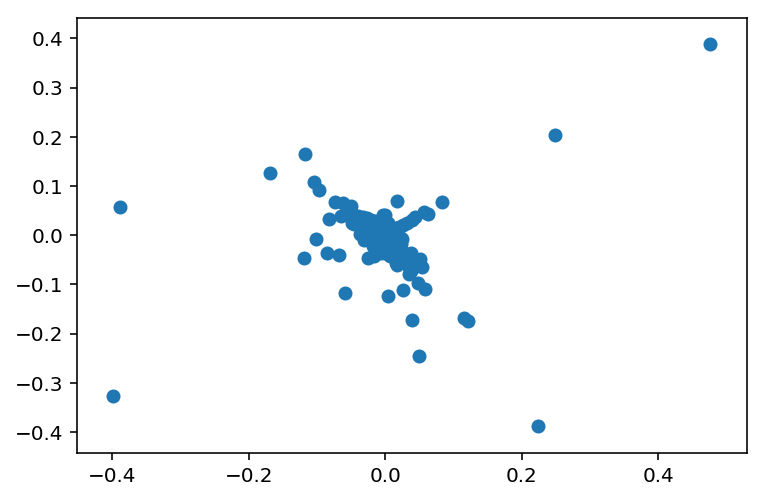

In [44]:
plt.scatter(eigvecs[0], eigvecs[1])

DBScan Clustering

In [397]:
#Clustering of Document Vector
db_e = DBSCAN(eps = 0.0007, algorithm='brute', metric='cosine').fit(tfidf_vecs.todense())
db_e.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [403]:
#Clustering of Document Vector
db_E = DBSCAN(eps = 0.0047, algorithm='brute', metric='cosine').fit(tfidf_vecs.todense())
db_E.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
#Clustering of PCA

In [45]:
eigvecs_t = eigvecs.transpose()
df_eigen = pd.DataFrame(eigvecs_t)
df_eigen.head()

,0,1
0,0.003850,-0.006231
1,0.000178,-0.000454
2,-0.000219,0.000161
3,-0.000109,0.000080
4,-0.000109,0.000080


DBSCAN Plots

In [ ]:
db = DBSCAN(eps = 0.0447, algorithm='kd_tree').fit(df_eigen)
db.labels_

In [ ]:
labels = list(db.labels_)
plt.scatter(df_eigen[0], df_eigen[1], c = labels)

More PCA Plotting

In [49]:
kmeans = KMeans(n_clusters=2)
pca_km = kmeans.fit_predict(eigvecs.transpose())

In [50]:
pca_km

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [123]:
#PCA Plot with MBKM of PCA Data
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Plot Of PCA of Saga Text')
label = [0, 1, 2]
colors = ['Skald-0', 'Skald-1', 'Skald-2']
plt.scatter(df_eigen[0], df_eigen[1], c = pca_mbkm)
plt.savefig('pca_mbkm.jpg')
plt.close()

In [82]:
mbkm = MiniBatchKMeans(n_clusters=3, random_state = 44)
pca_mbkm = mbkm.fit_predict(eigvecs.transpose())

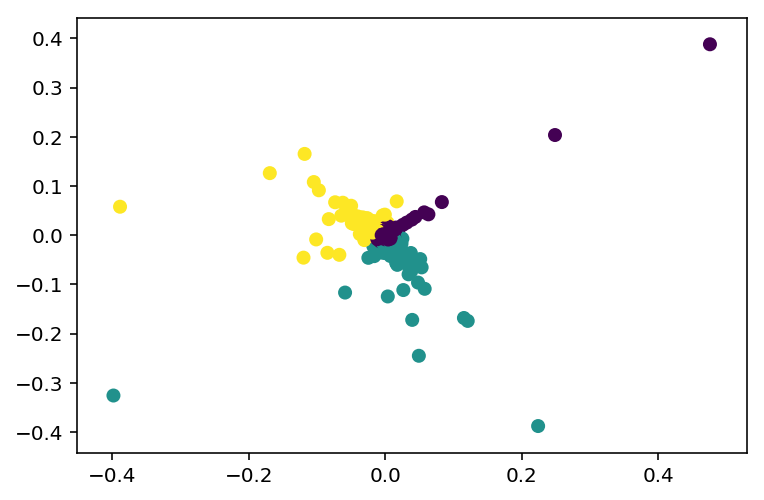

In [83]:
plt.scatter(df_eigen[0], df_eigen[1], c = pca_mbkm)

In [63]:
kmeans = KMeans(n_clusters=3)
authors2 = kmeans.fit_predict(nmf_vecs.transpose())

In [84]:
df_skald['Skald2'] = authors2

In [85]:
df_skald

,Title,Author,Text,Skald,Skald2
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2,2
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...,0,0
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...,0,0
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...,0,0
5,Fljótsdæla saga,unknown,['Þorgerður hét kona Hún bjó í Fljótsdal austu...,0,0
6,Flóamanna saga,unknown,['Haraldur konungur gullskeggur réð fyrir Sogn...,0,0
7,Fóstbræðra saga,unknown,['Á dögum hins helga Ólafs konungs voru margir...,0,0
8,Grettir's Saga\n,unknown,['Önundur hét maður Hann var Ófeigsson burlufó...,0,0
9,Grænlendinga saga,unknown,['Þorvaldur hét maður sonur Ásvalds Úlfssonar ...,0,0


In [86]:
with open('df_skald.pkl', 'wb') as picklefile:
    pickle.dump(df_skald, picklefile)

Volsung Saga

In [126]:
with open('volsung.pkl', 'rb') as picklefile:
    volsung = pickle.load(picklefile)

In [127]:
volsung

[['1 Kapítuli',
  'Hér hefr upp ok segir frá þeim manni er Sigi er nefndr ok kallaðr at héti sonr Óðins Annarr maðr er nefndr til sögunnar er Skaði hét Hann var ',
  'ríkr ok mikill fyrir sér en þó var Sigi þeira enn ríkari ok ættstærri at því er menn mæltu í þann tíma Skaði átti þræl þann er nokkut verðr at geta við söguna ',
  'Hann hét Breði Hann er fróðr við þat er hann skyldi at hafast Hann hafði íþróttir ok atgervi jafnframt hinum er meira þóttu verðir eða umfram nokkura ',
  'Þat er at segja eitthvert sinn at Sigi ferr á dýraveiði ok með honum þrællinn ok veiða dýr um daginn allt til aptans En er þeir bera saman veiði ',
  'sína um aptaninn þá hafði Breði veitt miklu fleira ok meira en Sigi en honum líkaði stórilla ok segir at sik undri at einn þræll skuli sik yfirbuga í dýraveiði ',
  'hleypr því at honum ok drepr hann dysjar síðan líkit í snjófönn',
  'Nú ferr hann heim um kveldit ok segir at Breði hafi riðit frá honum á skóginn  ok var hann senn ór augliti mér ok veit ek ekki

In [128]:
df_skald.head()

,Title,Author,Text,Skald,Skald2
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2,2
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...,0,0
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...,0,0
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...,0,0


In [172]:
volsung_saga = [' '.join(x) for x in volsung]
vs = {}
vs['Title'] = 'Volsung Saga'
vs['Author'] = 'unknown'
vs['Text'] = stringer(volsung_saga)
vs['Skald'] = 'na'
vs['Skald2'] = 'na'
#pd.DataFrame(vs)

In [166]:
#vs.columns = ['Title', 'Author', 'Text', 'Skald', 'Skald2']
vs

,0
0,Volsung Saga
1,unknown
2,['1 Kapítuli Hér hefr upp ok segir frá þeim ma...
3,na
4,na


In [161]:
new_skald = pd.concat([df_skald, vs], axis = 0)

/Users/thaddeusnorman/anaconda/lib/python3.6/site-packages/pandas/indexes/api.py:71: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [163]:
new_skald.tail()

,Title,Author,Text,Skald,Skald2,0
0,NaN,NaN,NaN,NaN,NaN,Volsung Saga
1,NaN,NaN,NaN,NaN,NaN,unknown
2,NaN,NaN,NaN,NaN,NaN,['1 Kapítuli Hér hefr upp ok segir frá þeim ma...
3,NaN,NaN,NaN,NaN,NaN,na
4,NaN,NaN,NaN,NaN,NaN,na


In [147]:
new_skald = pd.DataFrame(ls_skald)

In [148]:
new_skald

,0
0,Title
1,Author
2,Text
3,Skald
4,Skald2
5,Volsung Saga
6,unknown
7,['1 Kapítuli Hér hefr upp ok segir frá þeim ma...
8,na
9,na


Saga Transpose

In [174]:
nmf_vecs.shape

(47503, 59)

In [203]:
inertia_score_t = []
for n in range(1,20):
    kmeans_t = KMeans(n_clusters=n)
    kmeans_t.fit_predict(nmf_vecs)
    inertia_score_t.append([n, kmeans_t.inertia_])

In [204]:
inertia_score_t = pd.DataFrame(inertia_score_t)

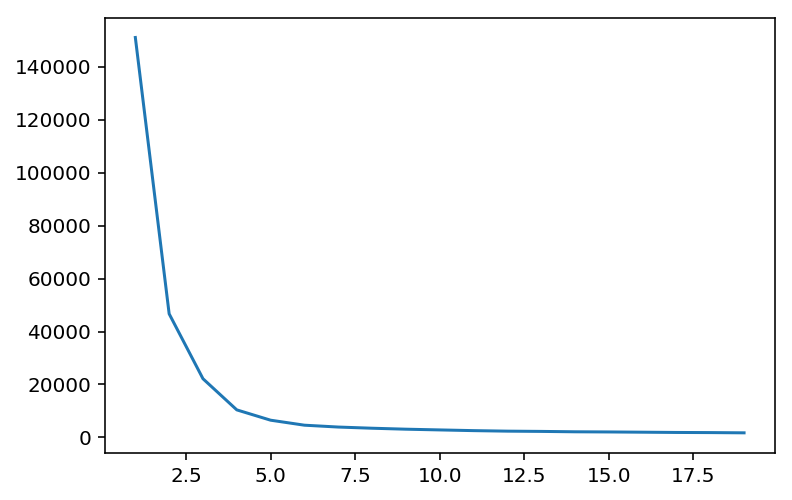

In [205]:
plt.plot(inertia_score_t.iloc[:,0], inertia_score_t.iloc[:,1])

In [206]:
kmeans_t = KMeans(n_clusters=3)
authors_3 = kmeans_t.fit_predict(nmf_vecs)

(0, 100)

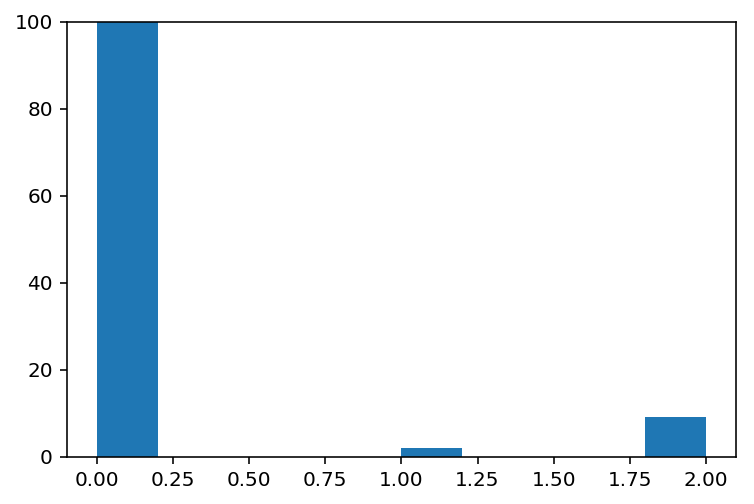

In [290]:
plt.hist(authors_3)
plt.ylim([0,100])

In [252]:
# Transform the data into our 2-D PCA space
tfidf_vecs_pca = pca.fit_transform(tfidf_vecs.todense())
# Retrieve and print the eigenvectors
eigvecs_t = pca.components_
len(eigvecs_t[0])

47503

In [258]:
eigvecs_t = pd.DataFrame(eigvecs_t.transpose())
eigvecs_t.head()

,0,1
0,0.003850,-0.006231
1,0.000178,-0.000454
2,-0.000219,0.000161
3,-0.000109,0.000080
4,-0.000109,0.000080


In [259]:
km_t = KMeans(n_clusters=3, random_state = 44)
pca_km_t = km_t.fit_predict(eigvecs_t)

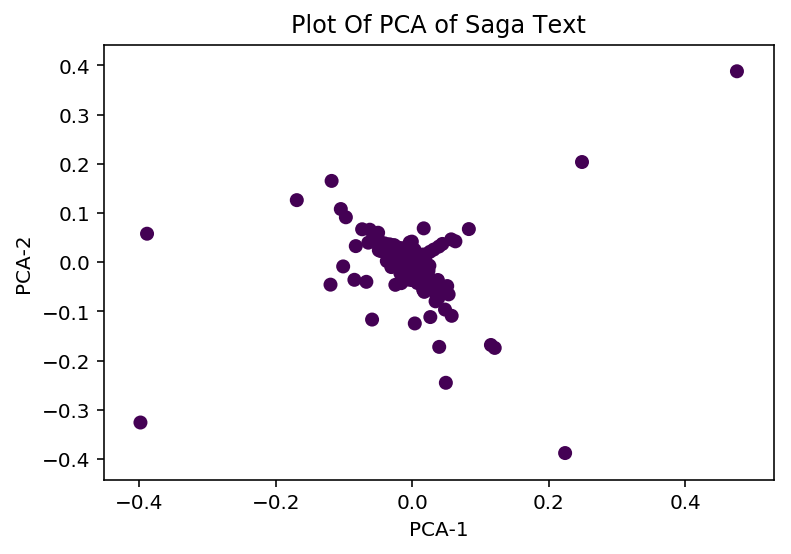

In [286]:
#PCA Plot with MBKM of PCA Data
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Plot Of PCA of Saga Text')
#label = [0, 1, 2]
#colors = ['Skald-0', 'Skald-1', 'Skald-2']
plt.scatter(eigvecs_t.iloc[:,0], eigvecs_t.iloc[:,1], c = db_e.labels_)

In [284]:
#Clustering of Document Vector
db_e = DBSCAN(eps = 0.0003, algorithm='brute', metric='cosine').fit(eigvecs_t)
len(db_e.labels_)

47503

In [285]:
set(db_e.labels_)

{0, 1, 2}

(0, 500)

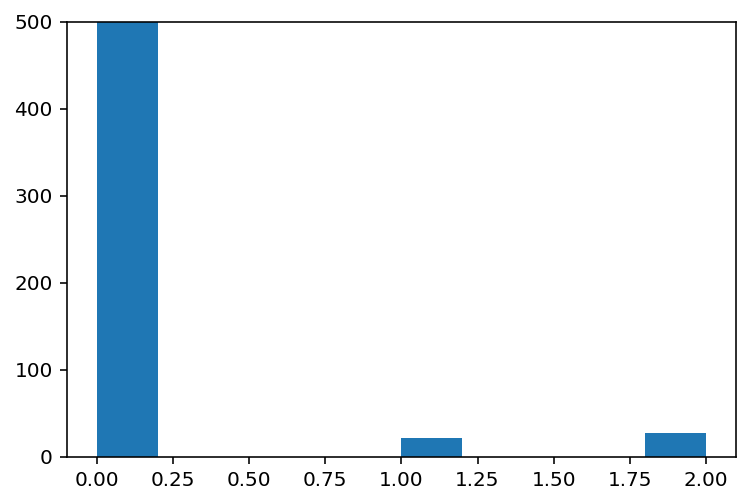

In [288]:
plt.hist(db_e.labels_)
plt.ylim([0, 500])

N-Gram Model

In [273]:
cv_ng = CountVectorizer(ngram_range = (1,3), min_df = 3, max_df = 50)

In [274]:
cv_ng_vecs = cv_ng.fit_transform(df_skald['Text'])
pd.DataFrame(cv_ng_vecs.todense(), 
             columns=cv_ng.get_feature_names()
            ).head()

,10,10 orusta,100,101,11,11 frá,12,12 frá,13,13 frá,...,þú þá til,þú þær,þú þér,þú þó,þú þórhallur,þú þórður,þú þóttist,þú þökk,þúfu,þýðast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
nmf_ng = NMF(n_components=59)
nmf_ng_vecs = nmf.fit_transform(cv_ng_vecs)

In [276]:
inertia_ng_score = []
for n in range(1,20):
    kmeans_ng = KMeans(n_clusters=n)
    kmeans_ng.fit_predict(nmf_ng_vecs.transpose())
    inertia_ng_score.append([n, kmeans_ng.inertia_])

In [277]:
inertia_ng_score = pd.DataFrame(inertia_ng_score)

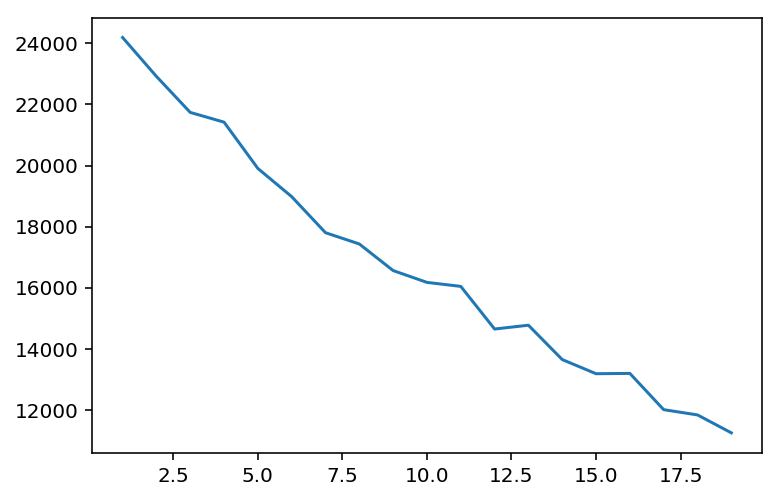

In [278]:
plt.plot(inertia_ng_score.iloc[:,0], inertia_ng_score.iloc[:,1])

In [192]:
df_skald.head()

,Title,Author,Text,Skald,Skald2
0,Bárðar saga snæfellsáss,unknown,['Dumbur hefir konungur heitið Hann réð fyrir ...,1,1
1,Bjarnar saga hítdælakappa,unknown,['Nú skal segja nokkuð af þeim íslensku mönnum...,2,2
2,Droplaugarsona saga,unknown,['Ketill hét maður er kallaður var þrymur Hann...,0,0
3,Egil's Saga\n,unknown,['Úlfur hét maður sonur Bjálfa og Hallberu dót...,0,0
4,Finnboga saga ramma,unknown,['Ásbjörn hét maður Hann var kallaður dettiás ...,0,0
